# データの分布

## >> Cells With Mask
* NDAcquisition-01：45,723
* NDAcquisition-01x40：130,092
* NDAcquisition-02Nami_x20：9,096
* NDAcquisition-02Nami_x40：4,236

## >> Cells No Mask
* NDAcquisition-01：45,870
* NDAcquisition-01x40：130,147
* NDAcquisition-02Nami_x20：9,321
* NDAcquisition-02Nami_x40：4,236

# Max_shape_0 , Max_shape_1


### >> Cells 

    * 01x20
        * Max_shape_0:  234
        * Max_shape_1:  214

    * 02Namix20
        * Max_shape_0:  254
        * Max_shape_1:  234

    * 01x40
        * Max_shape_0:  464
        * Max_shape_1:  499

    * 02Namix40
        * Max_shape_0:  354
        * Max_shape_1:  274

In [1]:
import cv2,os
import numpy as np
from matplotlib import pyplot as plt

# データの読み込み

In [2]:
mask = False
lens = "20"

if mask == True:
    Data_02Nami=np.load("imread_02Namix"+str(lens)+"_mask.npy",allow_pickle=True)
    Data_01=np.load("imread_01x"+str(lens)+"_mask.npy",allow_pickle=True)
else:
    Data_02Nami=np.load("imread_02Namix"+str(lens)+"_nomask.npy",allow_pickle=True)
    Data_01=np.load("imread_01x"+str(lens)+"_nomask.npy",allow_pickle=True)


print("Data_01.shape:", Data_01.shape)
print("Data_02Nami.shape:", Data_02Nami.shape)

Data_01.shape: (45870,)
Data_02Nami.shape: (9321,)


In [3]:
Data_01=Data_01[:1000]
Data_02Nami=Data_02Nami[:250]

print("Data_01.shape:", Data_01.shape)
print("Data_02Nami.shape:", Data_02Nami.shape)

Data_01.shape: (1000,)
Data_02Nami.shape: (250,)


# データ処理

## 1. Padding Unify the size

In [4]:
if int(lens) == 40:
    Max_shape_0 = 512
    Max_shape_1 = 512
elif int(lens) == 20:
    Max_shape_0 = 256
    Max_shape_1 = 256

In [5]:
#　同じサイズにする 
def datapadding(data):
    DataPad=[]
    for img in data:
        imgSize = img.shape
        top_size,bottom_size = (Max_shape_0-imgSize[0])//2,(Max_shape_0-imgSize[0])//2
        left_size,right_size = (Max_shape_1-imgSize[1])//2,(Max_shape_1-imgSize[1])//2
        if (imgSize[0] % 2) != 0:
            top_size,bottom_size = (Max_shape_0-imgSize[0])//2,(Max_shape_0-imgSize[0])//2+1
        if (imgSize[1] % 2) != 0:     
            left_size,right_size = (Max_shape_1-imgSize[1])//2,(Max_shape_1-imgSize[1])//2+1
        img_pad = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,cv2.BORDER_CONSTANT,value=(0,0,0))
        DataPad.append(img_pad)
    return DataPad

DataPad_01 = datapadding(Data_01)
DataPad_02Nami = datapadding(Data_02Nami)
print("DataPad_01: ",len(DataPad_01))
print("DataPad_02Nami: ",len(DataPad_02Nami))

DataPad_01:  1000
DataPad_02Nami:  250


## 2. Resize by using Bin_ndarray

In [6]:
# DataBinResize = []
# def bin_ndarray(ndarray, new_shape, operation):
#     operation = operation.lower()
#     if not operation in ['sum', 'mean']:
#         raise ValueError("Operation not supported.")
#     if ndarray.ndim != len(new_shape):
#         raise ValueError("Shape mismatch: {} -> {}".format(ndarray.shape,
#                                                            new_shape))
#     compression_pairs = [(d, c//d) for d,c in zip(new_shape,
#                                                   ndarray.shape)]
#     flattened = [l for p in compression_pairs for l in p]
#     ndarray = ndarray.reshape(flattened)
#     for i in range(len(new_shape)):
#         op = getattr(ndarray, operation)
#         ndarray = op(-1*(i+1))
#     return ndarray

# for img in DataResize:
#     imgresize = bin_ndarray(img, new_shape=(512,512,3), operation='mean')
#     DataBinResize.append(imgresize)

In [7]:
# DataBinResize = np.array(DataBinResize)
# print("DataBinResize: ", DataBinResize.shape)

# img = cv2.imread(DataPath[1])
# print("DataPath[1].shape: ", img.shape)
# plt.imshow(img)
# plt.show()

# print("DataResize[1].shape: ", DataResize[1].shape)
# plt.imshow(DataResize[1])
# plt.show()

# print("DataBinResize[1].shape: ", DataBinResize[1].shape)
# plt.imshow(DataBinResize[1]/255)
# plt.show()

## 3. Split Train and Test

In [8]:
DataPad_01 = DataPad_01
DataLabel_01 = np.zeros(len(DataPad_01), dtype=np.int)

DataPad_02Nami = DataPad_02Nami
DataLabel_02Nami = np.ones(len(DataPad_02Nami), dtype=np.int)

In [9]:
from sklearn.model_selection import train_test_split

X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(DataPad_01, DataLabel_01,
                                                                            test_size=0.3, random_state=42)


X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(DataPad_02Nami, DataLabel_02Nami,
                                                                            test_size=0.3, random_state=42)

X_train, X_test = np.concatenate((X_train_0, X_train_1), axis = 0), np.concatenate((X_test_0, X_test_1), axis = 0)
y_train, y_test = np.concatenate((y_train_0, y_train_1), axis = 0), np.concatenate((y_test_0, y_test_1), axis = 0)

print("Total number of train : ", len(y_train))
print("train_class_0 num : ", y_train.tolist().count(0))
print("train_class_1 num : ", y_train.tolist().count(1))
print("")

print("Total number of test : ", len(y_test))
print("test_class_0 num : ", y_test.tolist().count(0))
print("test_class_1 num : ", y_test.tolist().count(1))

Total number of train :  875
train_class_0 num :  700
train_class_1 num :  175

Total number of test :  375
test_class_0 num :  300
test_class_1 num :  75


# データ前処理

In [10]:
import torch
from torchvision import transforms
from tqdm import tqdm_notebook as tqdm
from PIL import Image
from sklearn.model_selection import train_test_split
torch.__version__

'1.9.0+cu102'

In [11]:
class train_dataset(torch.utils.data.Dataset):
    def __init__(self, x_train, y_train):
        data = x_train.astype('float32')
        self.x_train = []
        for i in range(data.shape[0]):
            self.x_train.append(Image.fromarray(np.uint8(data[i])))
        self.y_train = y_train
        self.transform = transforms.ToTensor()

    def __len__(self):
        return len(self.x_train)

    def __getitem__(self, idx):
        return self.transform(self.x_train[idx]), torch.tensor(y_train[idx], dtype=torch.long)

    
class test_dataset(torch.utils.data.Dataset):
    def __init__(self, x_test, y_test):
        data = x_test.astype('float32')
        self.x_test = []
        for i in range(data.shape[0]):
            self.x_test.append(Image.fromarray(np.uint8(data[i])))
        self.y_test = y_test
        self.transform = transforms.ToTensor()

    def __len__(self):
        return len(self.x_test)

    def __getitem__(self, idx):
        return self.transform(self.x_test[idx]), torch.tensor(y_test[idx], dtype=torch.long)

trainval_data = train_dataset(X_train, y_train)
test_data = test_dataset(X_test, y_test)

In [12]:
batch_size = 64

val_size = int(len(trainval_data)*0.2)
train_size = len(trainval_data) - val_size
print("train_size: ",train_size)
print("val_size: ",val_size)
print("test_size: ",len(y_test))

train_data, val_data = torch.utils.data.random_split(trainval_data, [train_size, val_size])

dataloader_train = torch.utils.data.DataLoader(
    train_data,
    batch_size=batch_size,
    shuffle=True
)

dataloader_valid = torch.utils.data.DataLoader(
    val_data,
    batch_size=batch_size,
    shuffle=True
)

dataloader_test = torch.utils.data.DataLoader(
    test_data,
    batch_size=batch_size,
    shuffle=True
)

train_size:  700
val_size:  175
test_size:  375


# ResNet遷移学習

In [13]:
import torch
import torchvision.models as models
import torch.nn as nn

In [14]:
model = models.resnet18(pretrained=True)
num_fcs = model.fc.in_features
# FC層のクラス数を変更
model.fc = nn.Sequential(
    nn.Linear(num_fcs, 512),
    # nn.Dropout(p=0.5),
    nn.ReLU(inplace=True),
    nn.Linear(512, 256),
    nn.ReLU(inplace=True),
    nn.Linear(256, 2)
)

#Freeze model weights
for param in model.parameters():
    param.requires_grad = True
for param in model.fc.parameters():
    param.requires_grad = True
    
model.avgpool = nn.AdaptiveAvgPool2d(1)
loss_func = nn.NLLLoss()
model = model.cuda()

In [34]:
# lr
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # 定义优化器
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.99)
for epoch in range(200):
    print(f'epoch:{epoch + 1}, lr{scheduler.get_lr()}')
    optimizer.step()
    # train
    # eval
    scheduler.step()

/home/acd13264yb/jupyter_env/lib/python3.6/site-packages/torch/optim/lr_scheduler.py:449: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)


epoch:1, lr[0.01]
epoch:2, lr[0.009801]
epoch:3, lr[0.00970299]
epoch:4, lr[0.0096059601]
epoch:5, lr[0.009509900499]
epoch:6, lr[0.00941480149401]
epoch:7, lr[0.0093206534790699]
epoch:8, lr[0.0092274469442792]
epoch:9, lr[0.009135172474836408]
epoch:10, lr[0.009043820750088045]
epoch:11, lr[0.008953382542587164]
epoch:12, lr[0.008863848717161293]
epoch:13, lr[0.00877521022998968]
epoch:14, lr[0.008687458127689783]
epoch:15, lr[0.008600583546412886]
epoch:16, lr[0.008514577710948757]
epoch:17, lr[0.00842943193383927]
epoch:18, lr[0.008345137614500876]
epoch:19, lr[0.008261686238355867]
epoch:20, lr[0.008179069375972308]
epoch:21, lr[0.008097278682212584]
epoch:22, lr[0.00801630589539046]
epoch:23, lr[0.007936142836436554]
epoch:24, lr[0.007856781408072189]
epoch:25, lr[0.007778213593991467]
epoch:26, lr[0.007700431458051552]
epoch:27, lr[0.007623427143471037]
epoch:28, lr[0.007547192872036326]
epoch:29, lr[0.007471720943315963]
epoch:30, lr[0.007397003733882804]
epoch:31, lr[0.0073230

In [16]:
n_epochs = 100

# negative : ラベル0の数
# positive : ラベル1の数
# weight_for_0 : 1. / negative * (negative + positive)
# weight_for_1 : 1. / positive * (negative + positive)
# class_weight = {0 : weight_for_0, 1 : weight_for_1}
weights = torch.tensor([(len(DataPad_01)+len(DataPad_02Nami))/len(DataPad_01), 
                        (len(DataPad_01)+len(DataPad_02Nami))/len(DataPad_02Nami)]).cuda()
loss_function = nn.CrossEntropyLoss(weight=weights)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # 定义优化器
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.99) # 定义衰减策略

device = "cuda"
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# if torch.cuda.device_count() > 1:
#     model = nn.DataParallel(model)
# model.to(device)

losstrain=[]
lossvalid=[]
Accuracytrain=[]
Accuracyvalid=[]

for epoch in range(n_epochs):
    losses_train = []
    losses_valid = []
    # Train
    optimizer.step()
    model.train()
    n_train = 0
    acc_train = 0
    for x, t in dataloader_train:
        n_train += t.size()[0]
        model.zero_grad()  # 勾配の初期化
        x = x.to(device)  # テンソルをGPUに移動
        t = t.to(device)
        y = model.forward(x)  # 順伝播
        loss = loss_function(y, t)  # 誤差(クロスエントロピー誤差関数)の計算
        loss.backward()  # 誤差の逆伝播
        optimizer.step()  # パラメータの更新
        pred = y.argmax(1)  # 最大値を取るラベルを予測ラベルとする
        acc_train += (pred == t).float().sum().item()
        losses_train.append(loss.tolist())
    # Evaluate
    model.eval()
    n_val = 0
    acc_val = 0
    for x, t in dataloader_valid:
        n_val += t.size()[0]
        x = x.to(device)  # テンソルをGPUに移動
        t = t.to(device)
        y = model.forward(x)  # 順伝播
        loss = loss_function(y, t)  # 誤差(クロスエントロピー誤差関数)の計算
        pred = y.argmax(1)  # 最大値を取るラベルを予測ラベルとする
        acc_val += (pred == t).float().sum().item()
        losses_valid.append(loss.tolist())
    scheduler.step()
    # Visualize loss & accuracy    
    losstrain.append(np.mean(losses_train))   
    Accuracytrain.append(acc_train/n_train)
    lossvalid.append(np.mean(losses_train))
    Accuracyvalid.append(acc_val/n_val)
    print('EPOCH: {}, Train [Loss: {:.3f}, Accuracy: {:.3f}], Valid [Loss: {:.3f}, Accuracy: {:.3f}]'.format(epoch,np.mean(losses_train),acc_train/n_train,np.mean(losses_valid),acc_val/n_val))

/home/acd13264yb/jupyter_env/lib/python3.6/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


EPOCH: 0, Train [Loss: 1.343, Accuracy: 0.707], Valid [Loss: 208228.000, Accuracy: 0.806]
EPOCH: 1, Train [Loss: 0.481, Accuracy: 0.726], Valid [Loss: 157.618, Accuracy: 0.846]
EPOCH: 2, Train [Loss: 0.332, Accuracy: 0.844], Valid [Loss: 0.790, Accuracy: 0.920]
EPOCH: 3, Train [Loss: 0.258, Accuracy: 0.923], Valid [Loss: 0.378, Accuracy: 0.920]
EPOCH: 4, Train [Loss: 0.201, Accuracy: 0.936], Valid [Loss: 0.206, Accuracy: 0.943]
EPOCH: 5, Train [Loss: 0.206, Accuracy: 0.924], Valid [Loss: 0.305, Accuracy: 0.840]
EPOCH: 6, Train [Loss: 0.205, Accuracy: 0.921], Valid [Loss: 1.609, Accuracy: 0.309]
EPOCH: 7, Train [Loss: 0.174, Accuracy: 0.943], Valid [Loss: 0.317, Accuracy: 0.914]
EPOCH: 8, Train [Loss: 0.182, Accuracy: 0.937], Valid [Loss: 0.877, Accuracy: 0.897]
EPOCH: 9, Train [Loss: 0.186, Accuracy: 0.926], Valid [Loss: 0.340, Accuracy: 0.931]
EPOCH: 10, Train [Loss: 0.165, Accuracy: 0.941], Valid [Loss: 0.378, Accuracy: 0.800]
EPOCH: 11, Train [Loss: 0.146, Accuracy: 0.956], Valid [L

EPOCH: 96, Train [Loss: 0.024, Accuracy: 0.994], Valid [Loss: 0.154, Accuracy: 0.949]
EPOCH: 97, Train [Loss: 0.024, Accuracy: 0.994], Valid [Loss: 0.181, Accuracy: 0.949]
EPOCH: 98, Train [Loss: 0.024, Accuracy: 0.994], Valid [Loss: 0.171, Accuracy: 0.949]
EPOCH: 99, Train [Loss: 0.023, Accuracy: 0.994], Valid [Loss: 0.218, Accuracy: 0.943]


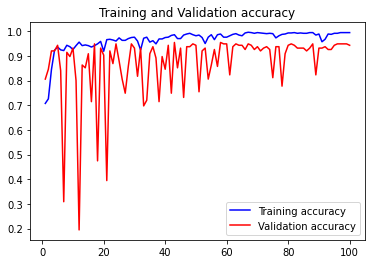

<Figure size 432x288 with 0 Axes>

In [17]:
# train processing plot
epochs=range(1,n_epochs+1)

plt.plot(epochs,Accuracytrain,'b',label='Training accuracy')  
plt.plot(epochs, Accuracyvalid,'r',label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.show()

In [18]:
losses_test = []
n_test = 0
acc_test = 0
model.eval()

for x, t in dataloader_test:
    n_test += t.size()[0]
    x = x.to(device)  # テンソルをGPUに移動
    t = t.to(device)
    y = model.forward(x)  # 順伝播
    loss = loss_function(y, t)  # 誤差(クロスエントロピー誤差関数)の計算
    pred = y.argmax(1)  # 最大値を取るラベルを予測ラベルとする
    acc_test += (pred == t).float().sum().item()
    losses_test.append(loss.tolist())

# Visualize loss & accuracy 
print("acc_test: ", acc_test) 
print("n_test: ", n_test)
print('Loss: {:.3f}, Accuracy: {:.3f}'.format(np.mean(losses_test),acc_test/n_test))

acc_test:  366.0
n_test:  375
Loss: 0.141, Accuracy: 0.976


# Random Probability

In [19]:
# NDAcquisition_01=45870
# NDAcquisition_02Nami_x20=9321

# NDAcquisition_01x40=130147
# NDAcquisition_02Nami_x40=4236

Total_number_of_train=38633
train_class_0_num=32109
train_class_1_num=6524

Total_number_of_test=16558
test_class_0_num=13761
test_class_1_num=2797

In [20]:
(test_class_0_num*(train_class_0_num/Total_number_of_train) + test_class_1_num*(train_class_1_num/Total_number_of_train))/Total_number_of_test

0.7192593590259224

# 特徴層可視化

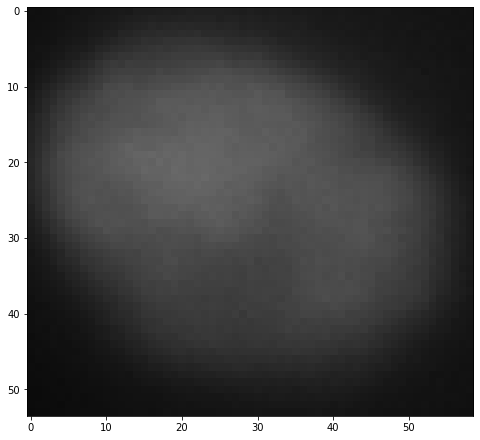

In [58]:
# 从测试集中读取一张图片，并显示出来
img_path = '../../Datasets/211202NDAcquisition/CellsNoMask/NDAcquisition-01x40/NDAcquisition-01x40_XY0001_14.tif'
img = Image.open(img_path)
imgarray = np.array(img)

plt.figure(figsize=(8,8))
plt.imshow(img)
plt.show()

In [59]:
# 将图片处理成模型可以预测的形式

transform = transforms.Compose([
    transforms.Resize([256,256]),
    transforms.ToTensor(),
])

input_img = transform(img).unsqueeze(0).to(device)
print(input_img.shape)

torch.Size([1, 3, 256, 256])


In [95]:
from torch.nn import functional as F
from collections import OrderedDict

# 定义钩子函数，获取指定层名称的特征
activation = {} # 保存获取的输出
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

In [74]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [61]:
model.layer1

Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
)

In [62]:
model.layer1[1]

BasicBlock(
  (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

torch.Size([1, 512, 8, 8])
torch.Size([64, 64])


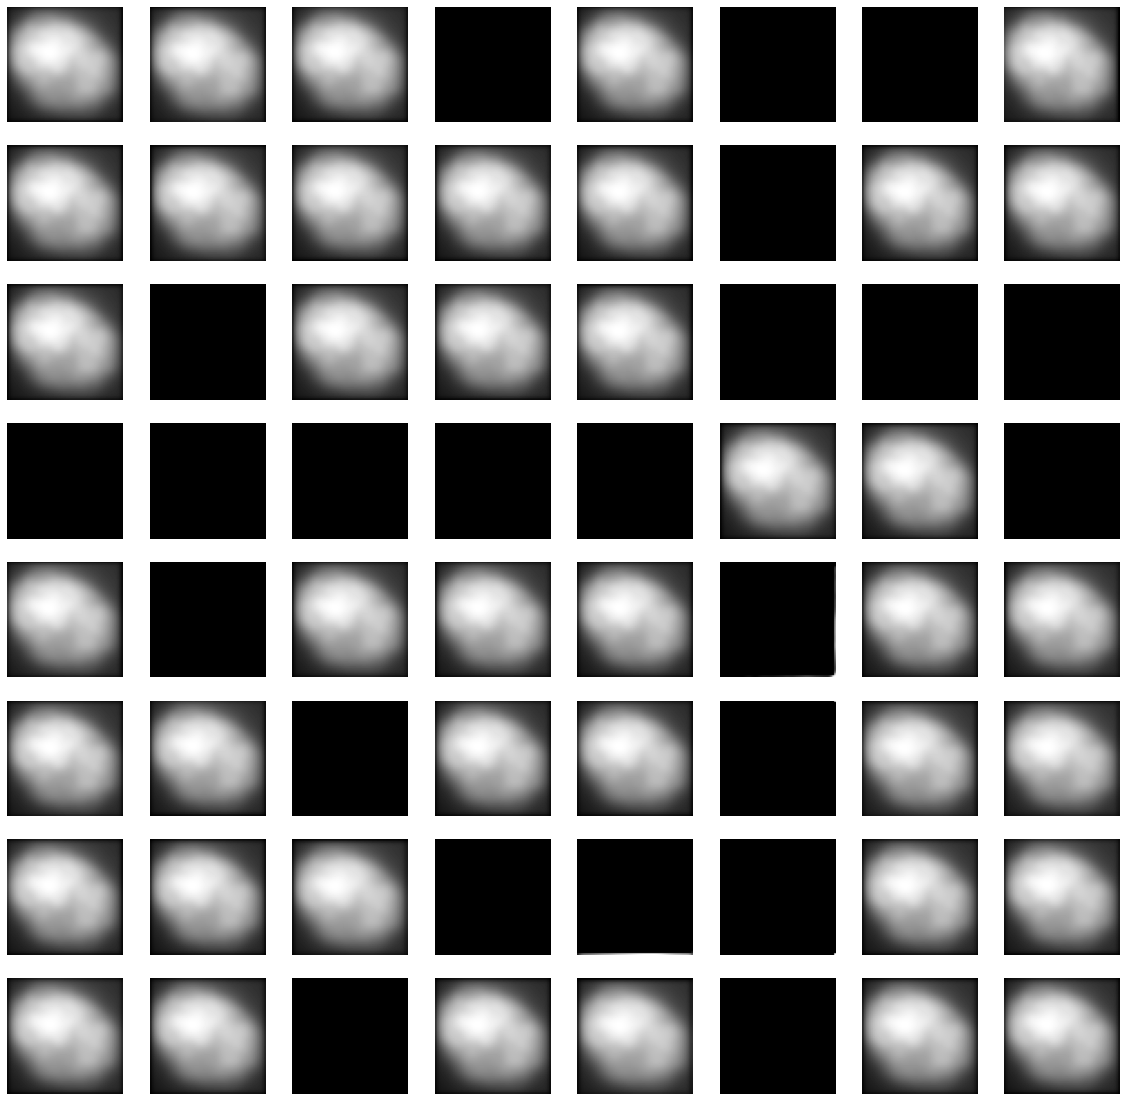

In [70]:
model.eval()
# 获取layer1里面的bn3层的结果，浅层特征
model.layer1[1].register_forward_hook(get_activation('bn1')) # 为layer1中第2个模块的bn3注册钩子
_ = model(input_img)

bn1 = activation['bn1'].cpu() # 结果将保存在activation字典中
print(bn3.shape)

# 可视化结果，显示前64张
print(bn1[0,1,:,:].shape)
plt.figure(figsize=(20,20))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.imshow(bn1[0,i,:,:], cmap='gray')
    plt.axis('off')
plt.show()

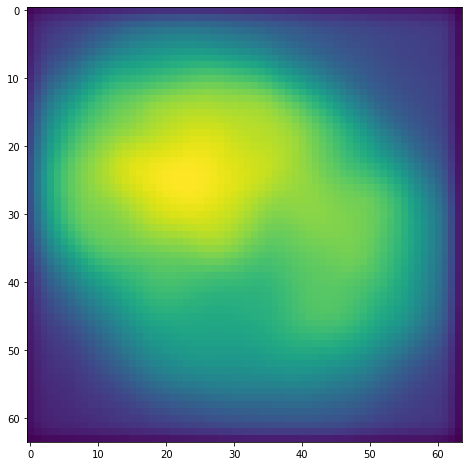

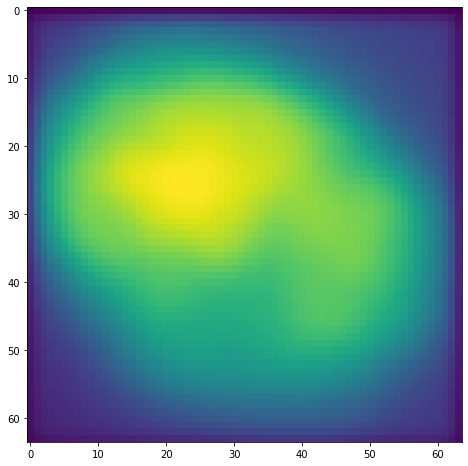

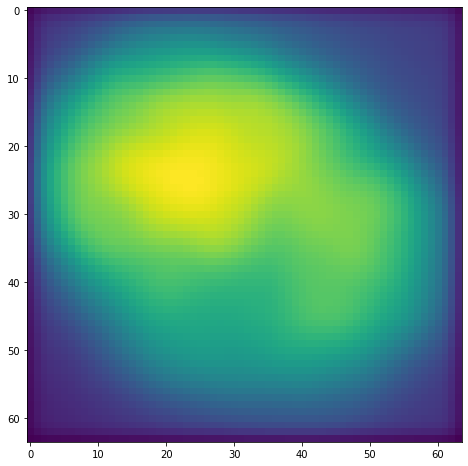

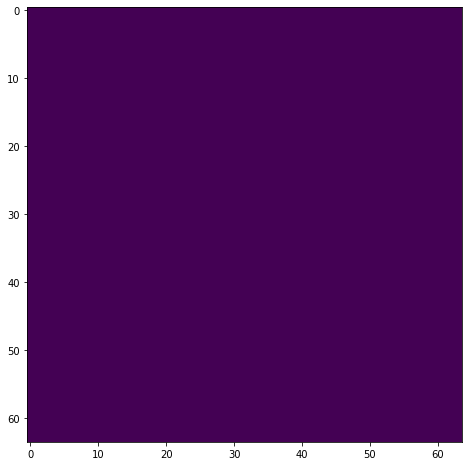

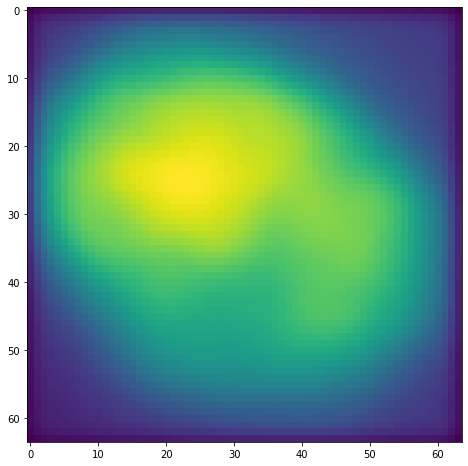

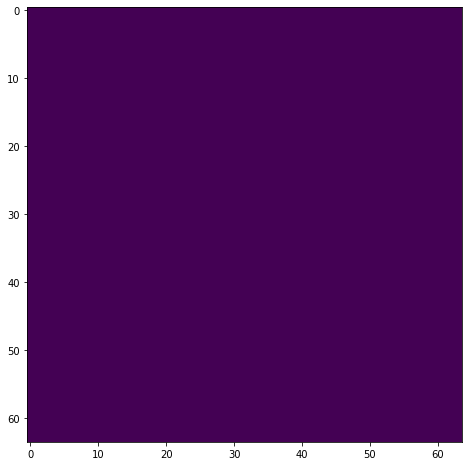

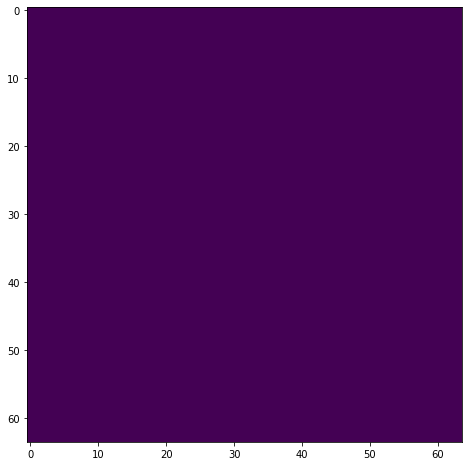

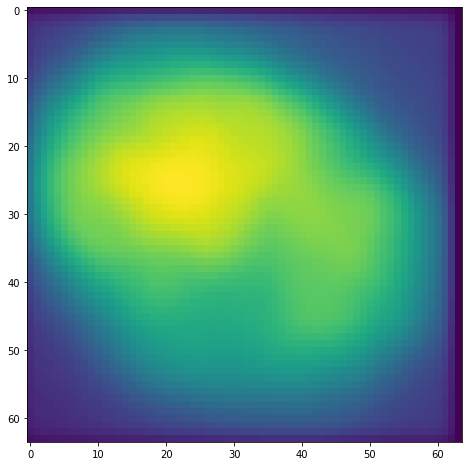

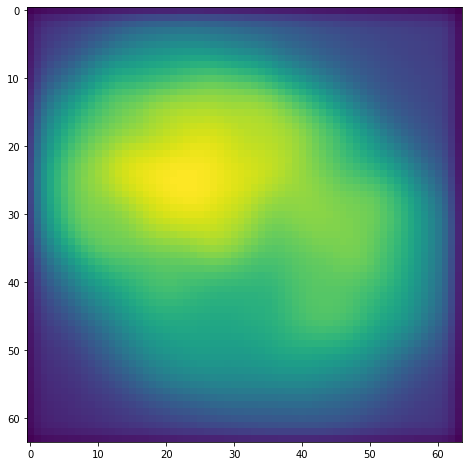

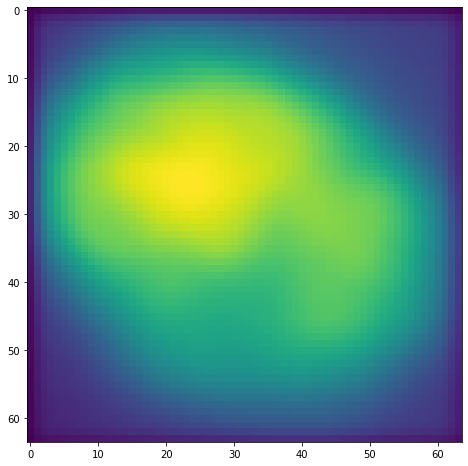

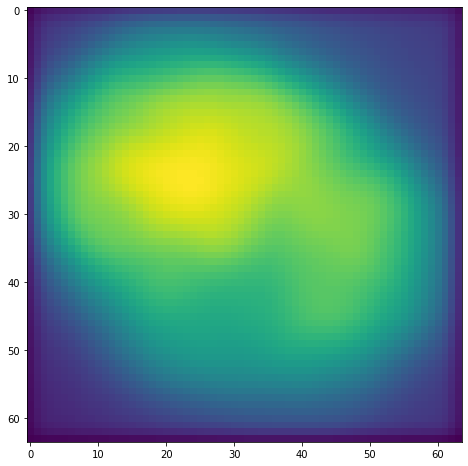

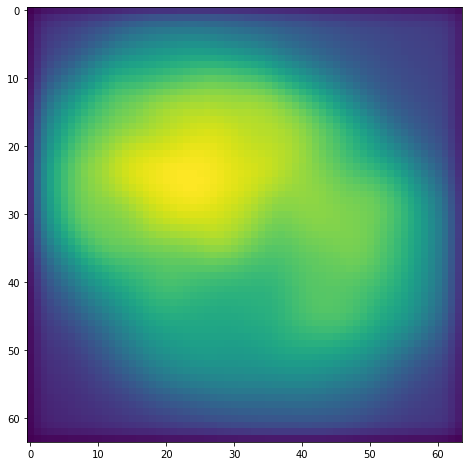

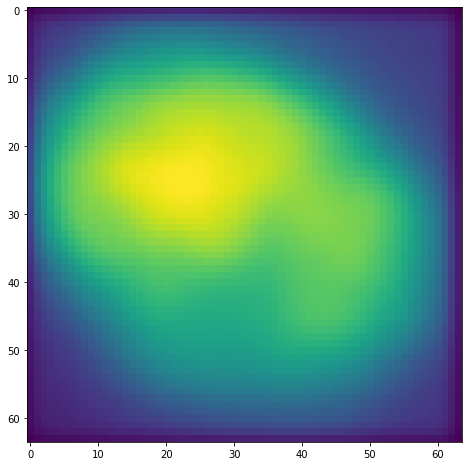

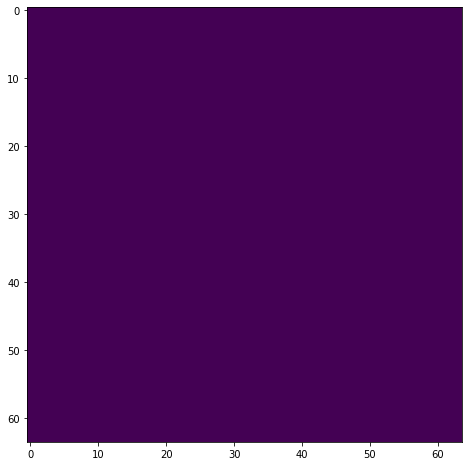

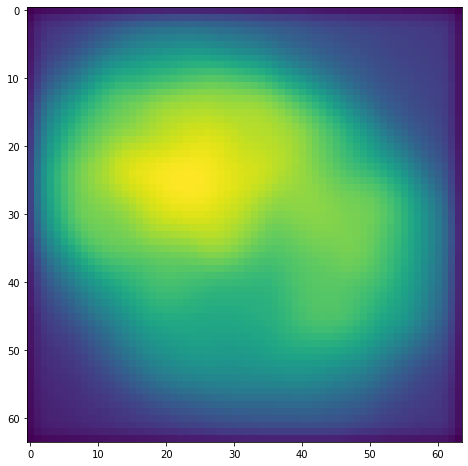

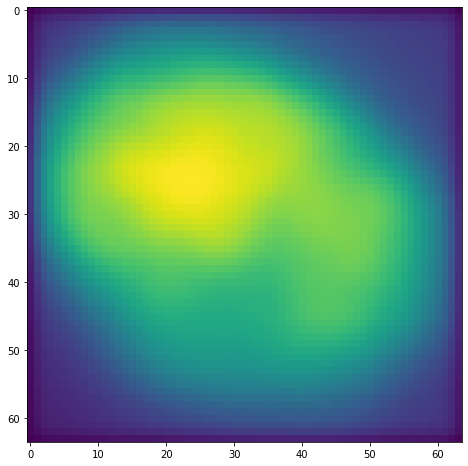

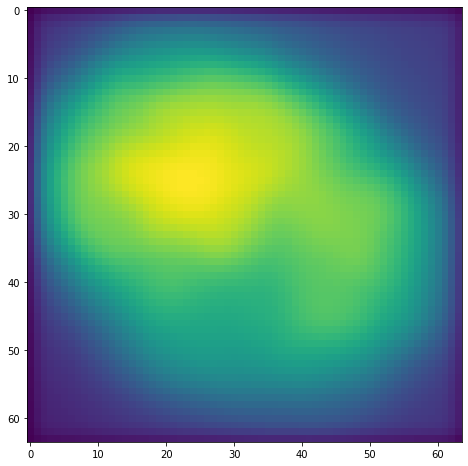

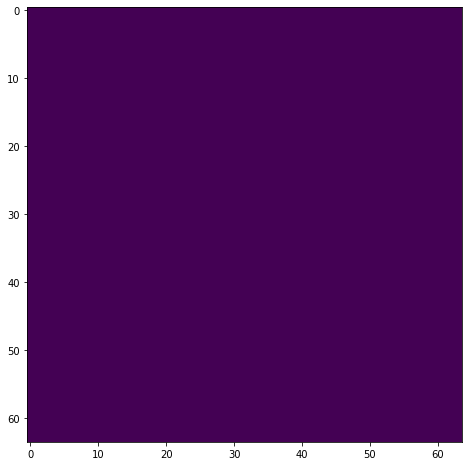

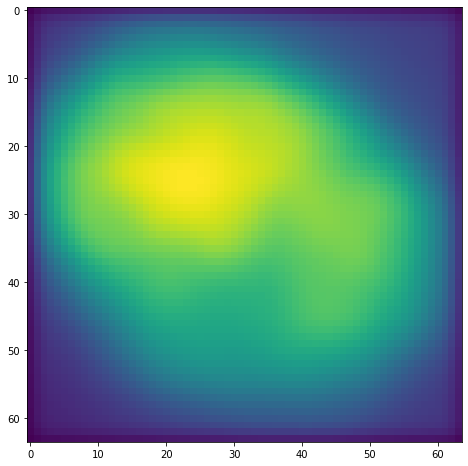

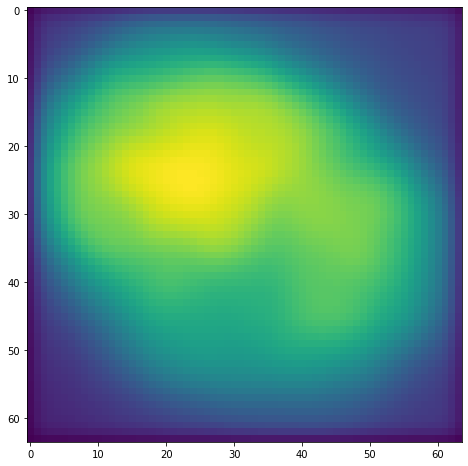

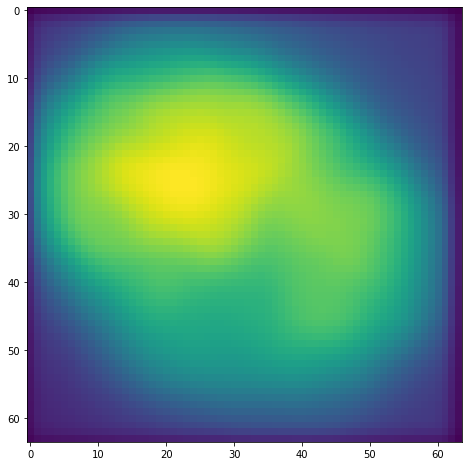

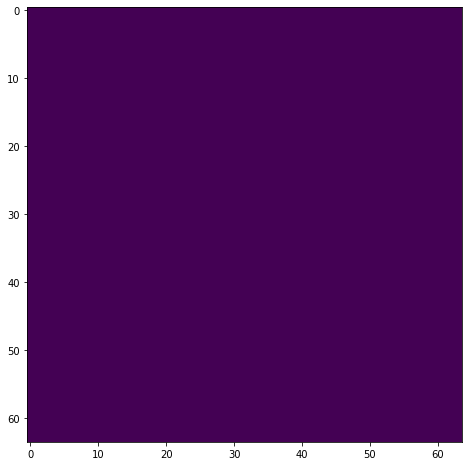

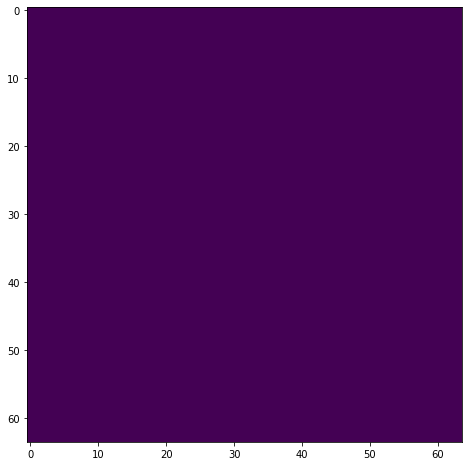

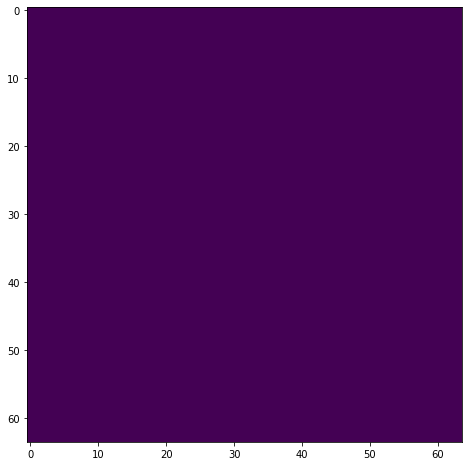

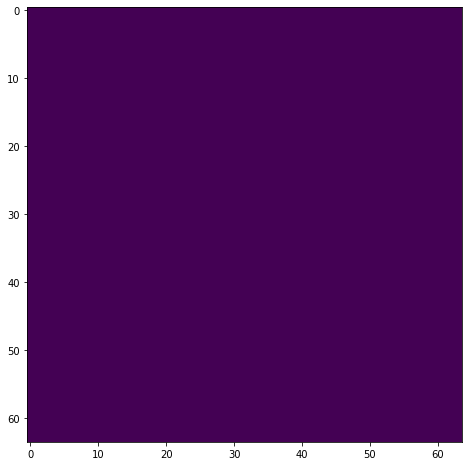

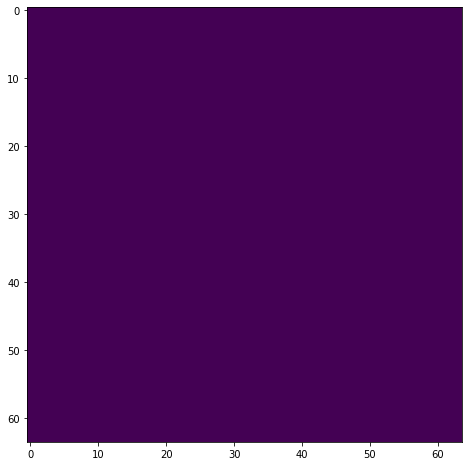

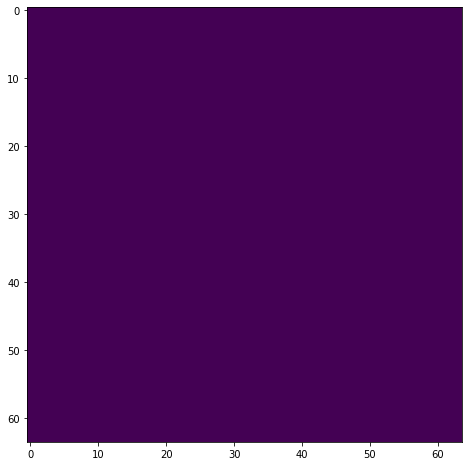

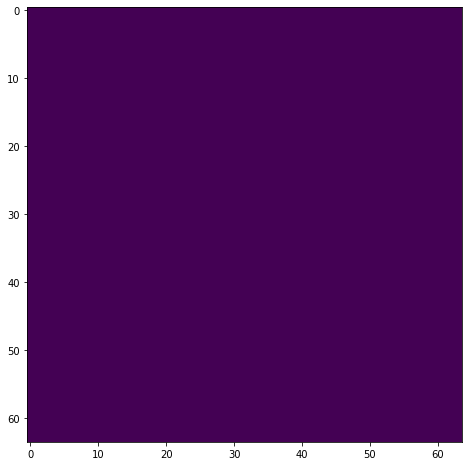

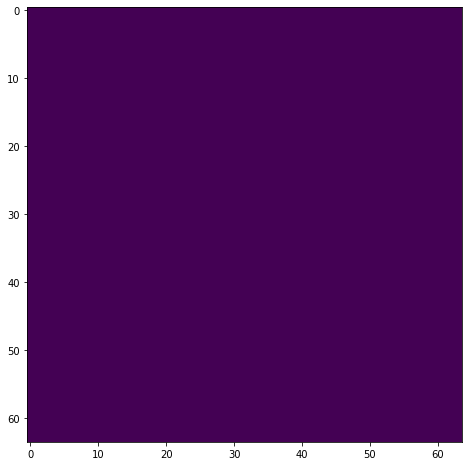

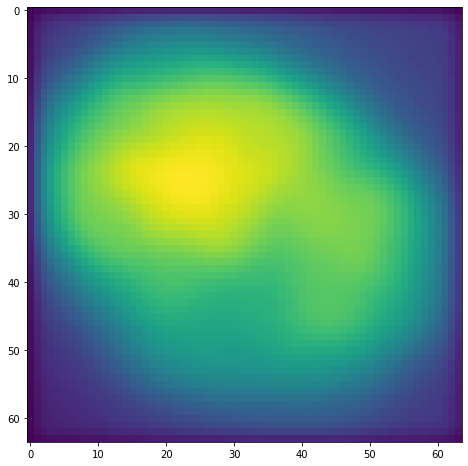

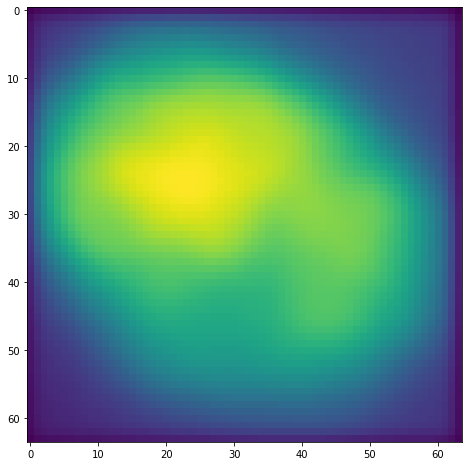

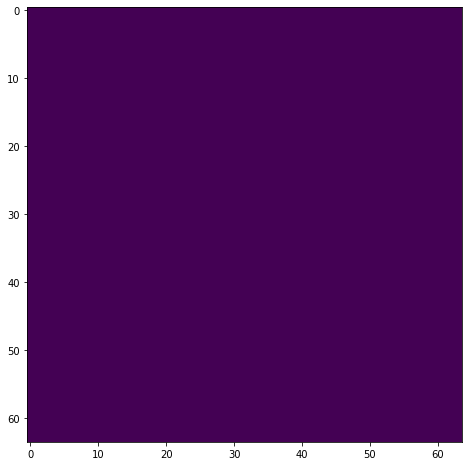

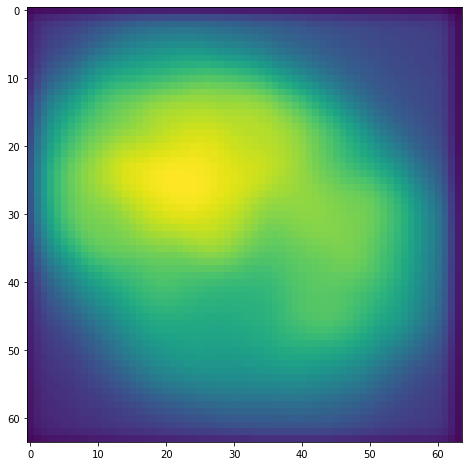

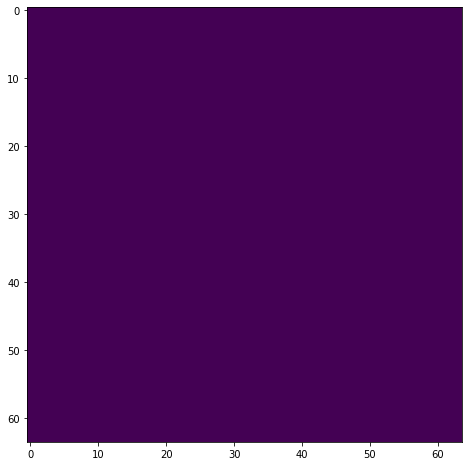

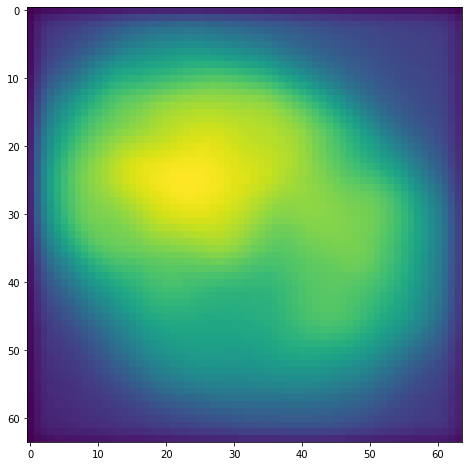

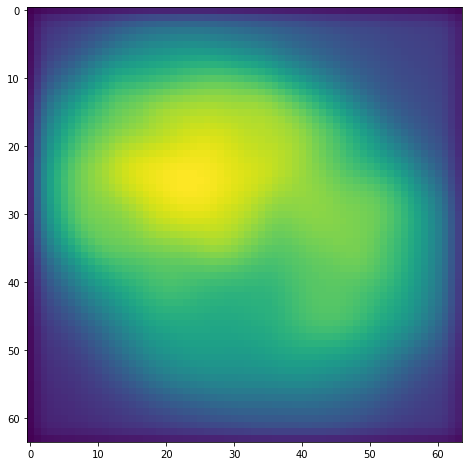

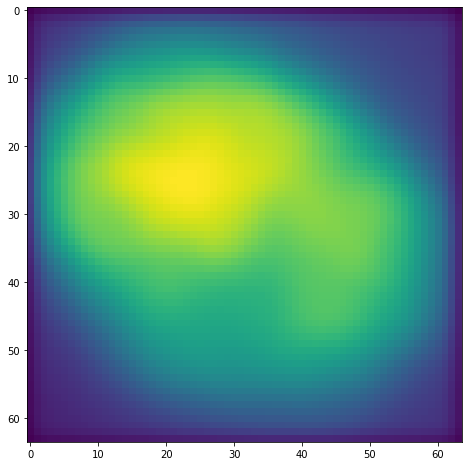

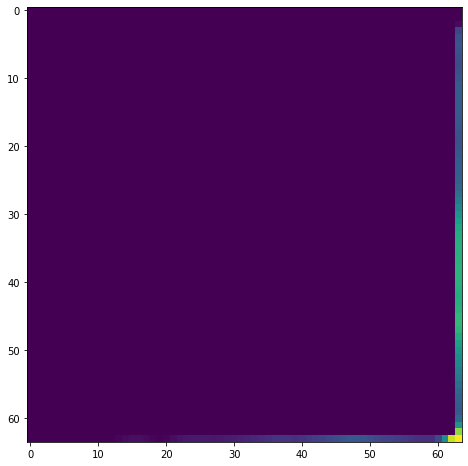

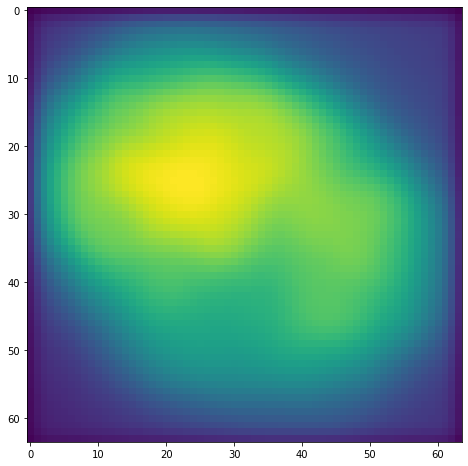

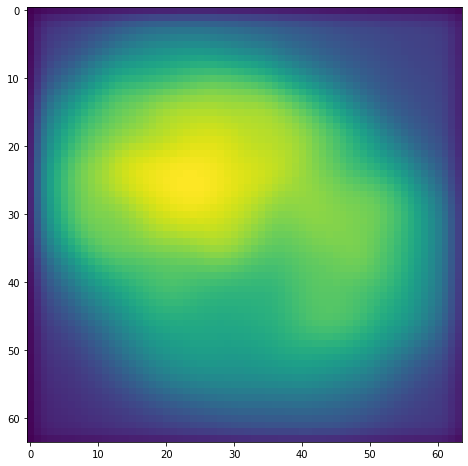

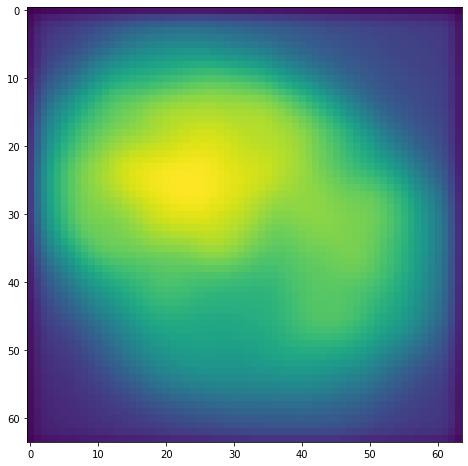

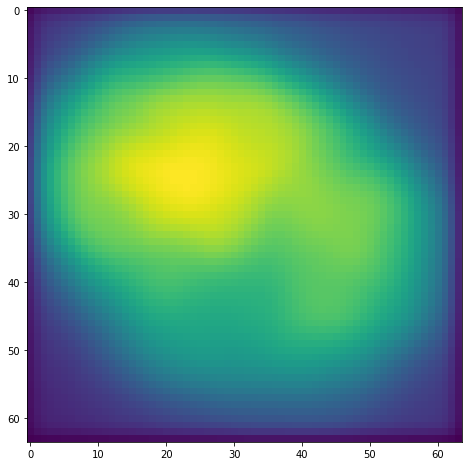

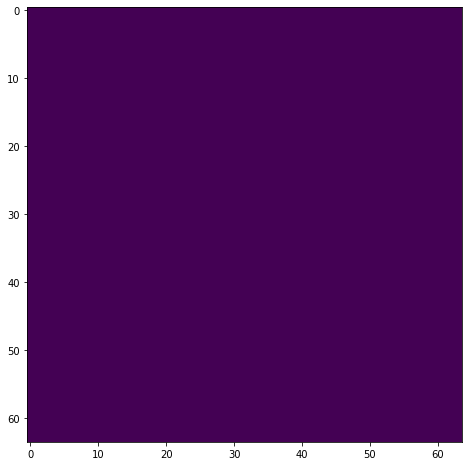

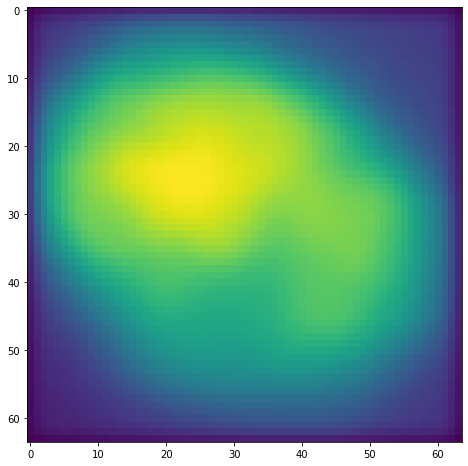

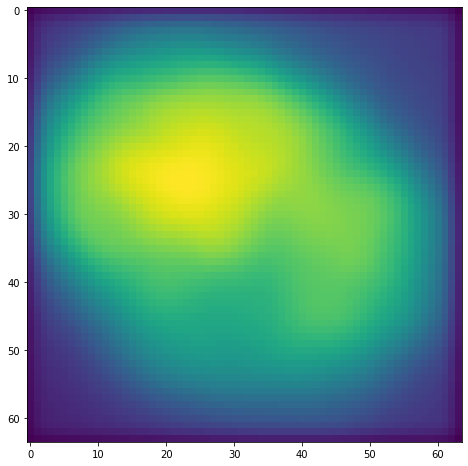

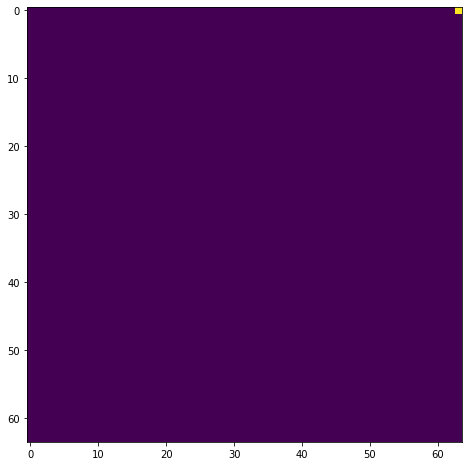

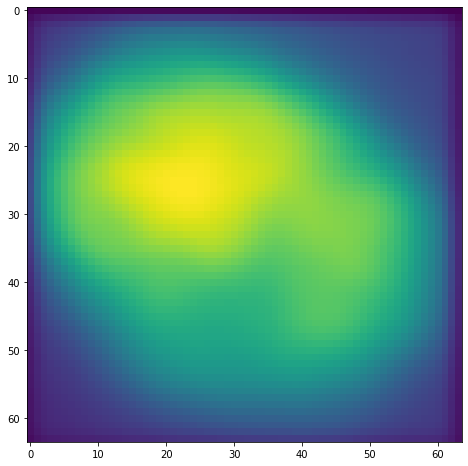

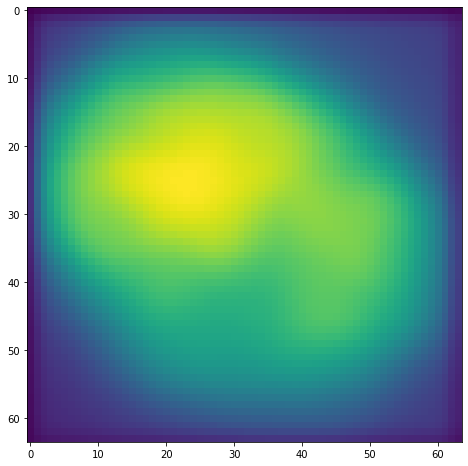

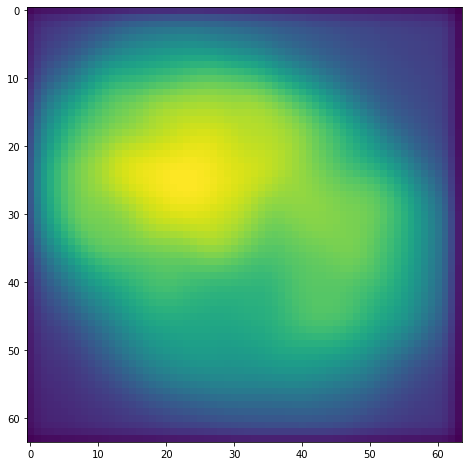

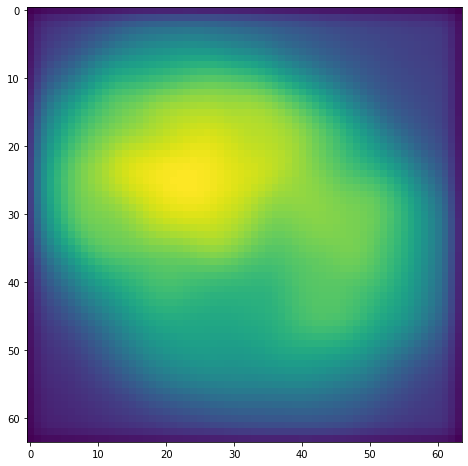

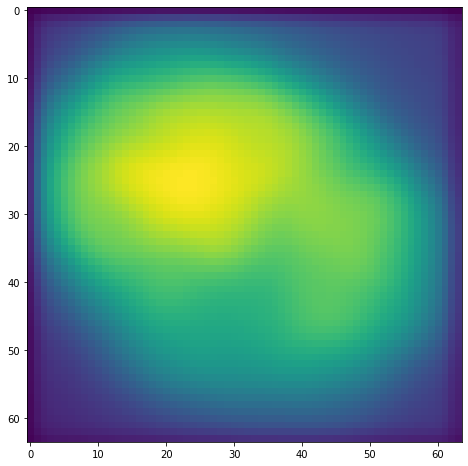

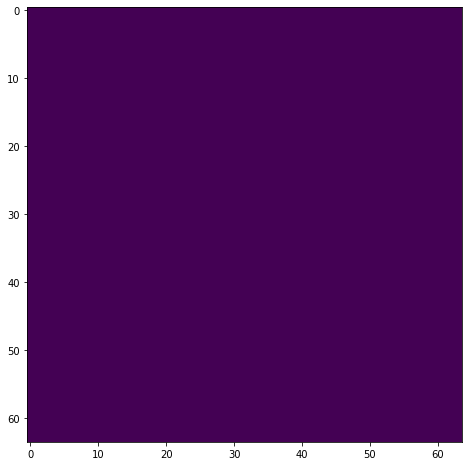

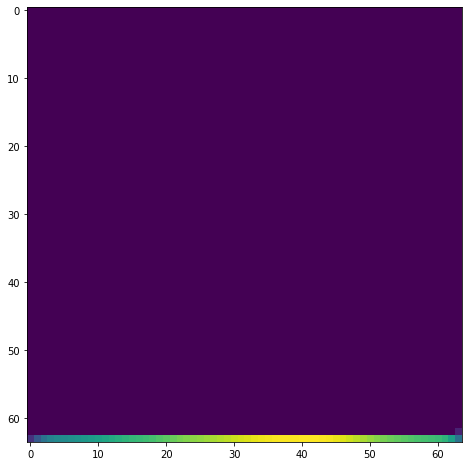

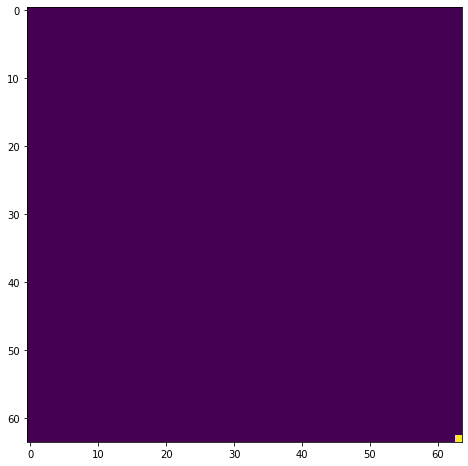

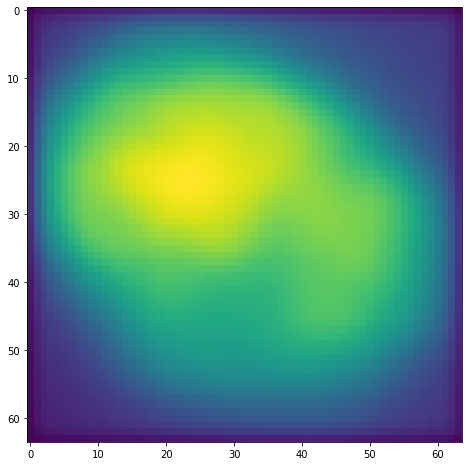

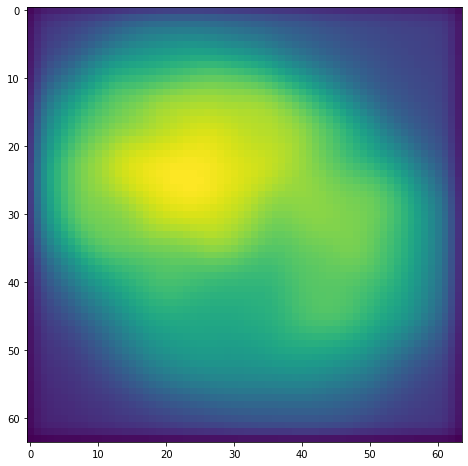

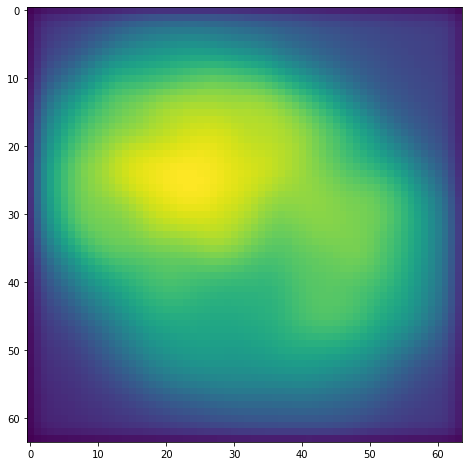

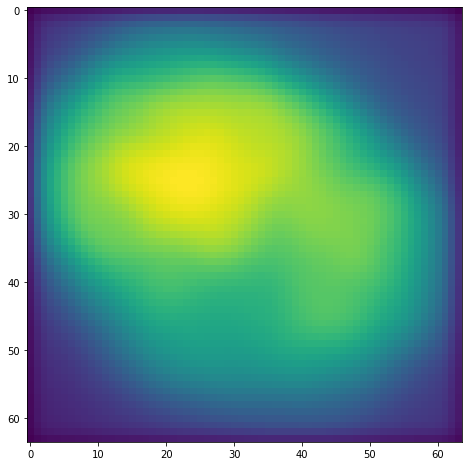

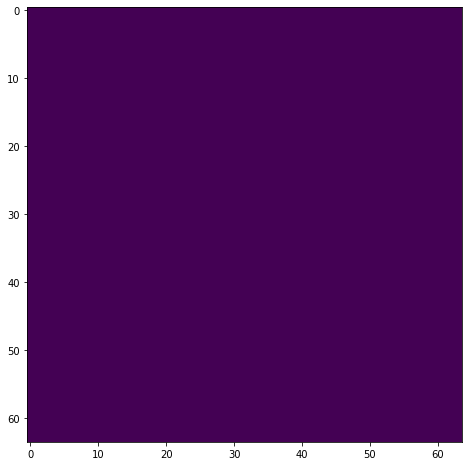

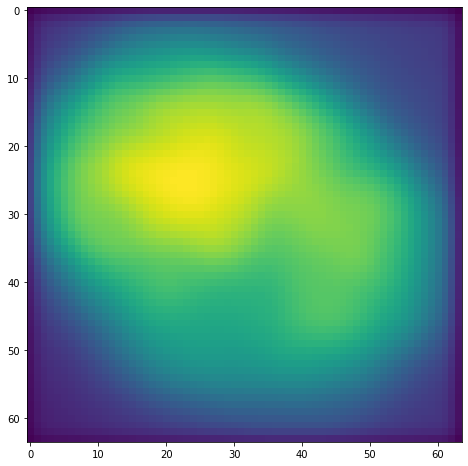

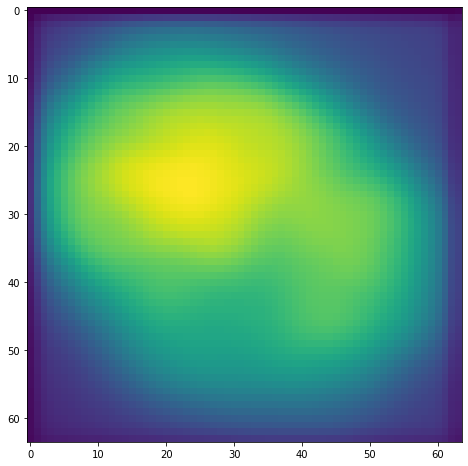

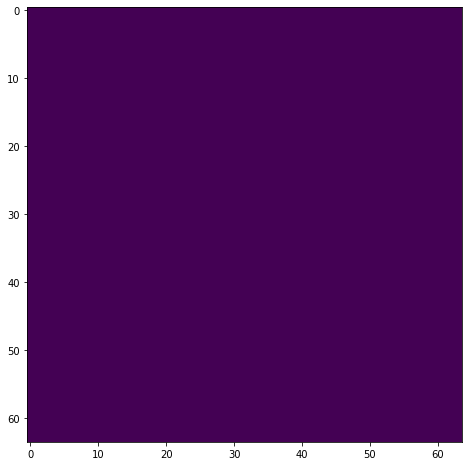

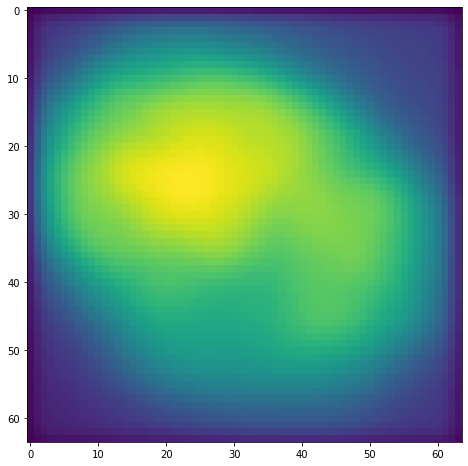

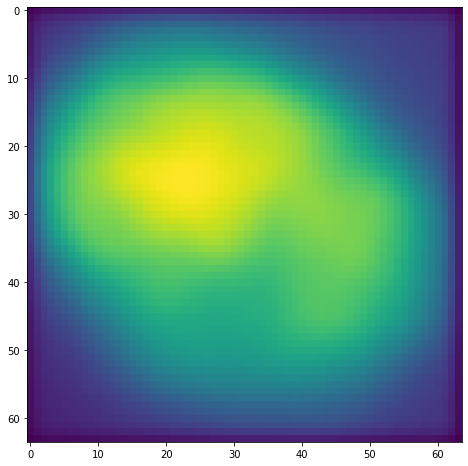

In [67]:
for i in range(64):
    plt.figure(figsize=(8,8))
    plt.imshow(bn1[0,i,:,:])
    plt.show()

In [92]:
model.layer4[1]

BasicBlock(
  (conv1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [98]:
activation

{'bn1': tensor([[[[7.5144e+03, 1.1400e+04, 1.3961e+04,  ..., 1.5153e+04,
            1.1504e+04, 5.2434e+03],
           [1.2384e+04, 1.8484e+04, 2.2503e+04,  ..., 2.4022e+04,
            1.8076e+04, 7.8336e+03],
           [1.5858e+04, 2.3572e+04, 2.8631e+04,  ..., 3.0028e+04,
            2.2516e+04, 9.6087e+03],
           ...,
           [1.1189e+04, 1.6414e+04, 1.9601e+04,  ..., 2.7448e+04,
            2.0525e+04, 8.6089e+03],
           [8.9340e+03, 1.3046e+04, 1.5530e+04,  ..., 2.1766e+04,
            1.6255e+04, 6.7116e+03],
           [5.0265e+03, 7.1612e+03, 8.4327e+03,  ..., 1.1670e+04,
            8.5997e+03, 3.3389e+03]],
 
          [[3.2809e+05, 4.9286e+05, 5.8786e+05,  ..., 6.0890e+05,
            4.4716e+05, 1.8456e+05],
           [1.0398e+06, 1.6920e+06, 2.0814e+06,  ..., 2.2793e+06,
            1.7682e+06, 8.9096e+05],
           [1.5173e+06, 2.4897e+06, 3.0846e+06,  ..., 3.3800e+06,
            2.6468e+06, 1.3650e+06],
           ...,
           [1.2088e+06, 1.9842e

torch.Size([1, 512, 8, 8])


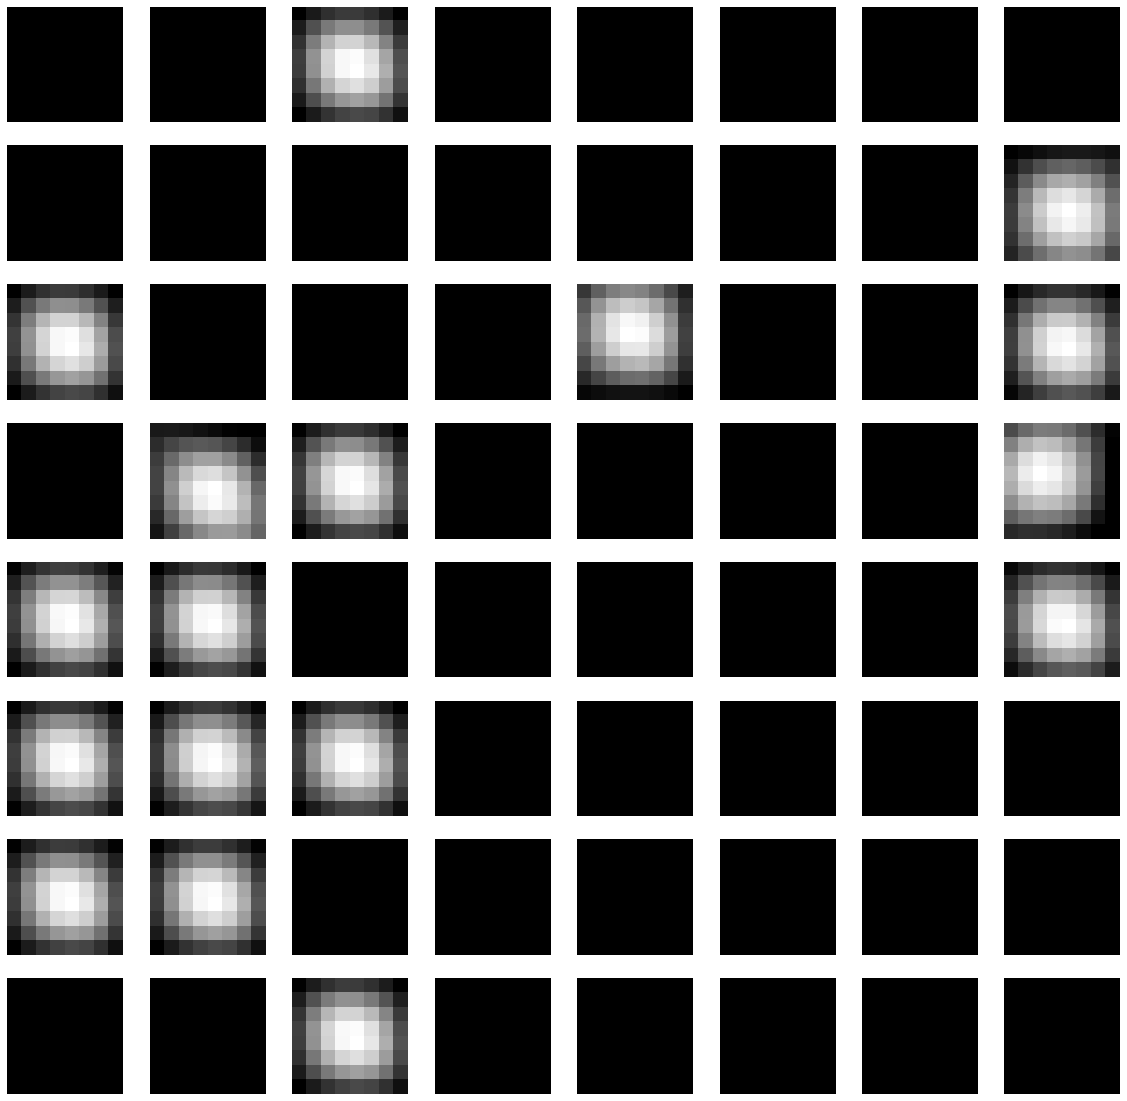

In [97]:
# 获取深层的特征映射
model.eval()
# 获取layer4中第3个模块的bn3层输出结果
model.layer4[1].register_forward_hook(get_activation('conv2'))
_ = model(input_img)

bn = activation['conv2'].cpu()
print(bn.shape)

# 绘制前64个特征
plt.figure(figsize=(20,20))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.imshow(bn[0,i,:,:], cmap='gray')
    plt.axis('off')
plt.show()

# 可視化Heat Map

In [28]:
class GradCAM(nn.Module):
    def __init__(self):
        super(GradCAM, self).__init__()
        # 获取模型的特征提取层
        self.feature = nn.Sequential(OrderedDict({
                name:layer for name, layer in model.named_children()
                if name not in ['avgpool','fc']
        }))
        # 获取模型最后的平均池化层
        self.avgpool = model.avgpool
        # 获取模型的输出层
        self.classifier = nn.Sequential(OrderedDict([
            ('fc', model.fc),
#             ('softmax', model.softmax)
        ]))
        # 生成梯度占位符
        self.gradients = None
    
    # 获取梯度的钩子函数
    def activations_hook(self, grad):
        self.gradients = grad
    
    def forward(self, x):
        x = self.feature(x)
        # 注册钩子
        h = x.register_hook(self.activations_hook)
        # 对卷积后的输出使用平均池化
        x = self.avgpool(x)
        x = x.view((1,-1))
        x = self.classifier(x)
        return x
    
    # 获取梯度的方法
    def get_activations_gradient(self):
        return self.gradients
    
    # 获取卷积层输出的方法
    def get_activations(self, x):
        return self.feature(x)

In [29]:
# 获取热力图
def get_heatmap(model, img):
    model.eval()
    img_pre = model(img)
    # 获取预测最高的类别
    pre_class = torch.argmax(img_pre, dim=-1).item()
    # 获取相对于模型参数的输出梯度
    img_pre[:, pre_class].backward()
    # 获取模型的梯度
    gradients = model.get_activations_gradient()
    # 计算梯度相应通道的均值
    mean_gradients = torch.mean(gradients, dim=[0,2,3])
    # 获取图像在相应卷积层输出的卷积特征
    activations = model.get_activations(input_img).detach()
    # 每个通道乘以相应的梯度均值
    for i in range(len(mean_gradients)):
        activations[:,i,:,:] *= mean_gradients[i]
    # 计算所有通道的均值输出得到热力图
    heatmap = torch.mean(activations, dim=1).squeeze()
    # 使用Relu函数作用于热力图
    heatmap = F.relu(heatmap)
    # 对热力图进行标准化
    heatmap /= torch.max(heatmap)
    heatmap = heatmap.cpu().numpy()

    return heatmap

In [30]:
cam = GradCAM()
# 获取热力图
heatmap = get_heatmap(cam, input_img)

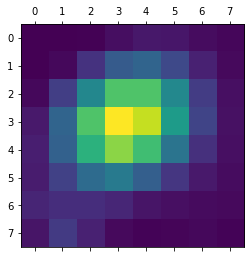

In [31]:
# 可视化热力图
plt.matshow(heatmap)
plt.show()

In [32]:
# 合并热力图和原题，并显示结果
def merge_heatmap_image(heatmap, image_path):
    img = cv2.imread(image_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    grad_cam_img = heatmap * 0.4 + img
    grad_cam_img = grad_cam_img / grad_cam_img.max()
    # 可视化图像
    b,g,r = cv2.split(grad_cam_img)
    grad_cam_img = cv2.merge([r,g,b])

    plt.figure(figsize=(8,8))
    plt.imshow(grad_cam_img)
    plt.show()

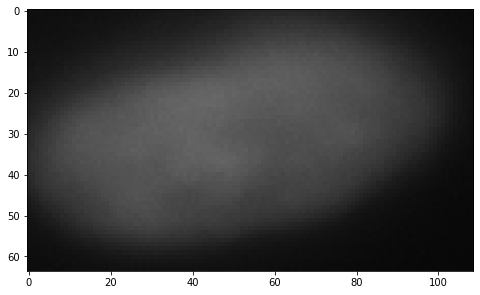

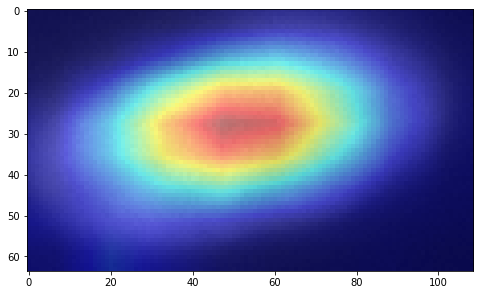

In [33]:
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.show()

merge_heatmap_image(heatmap, img_path)

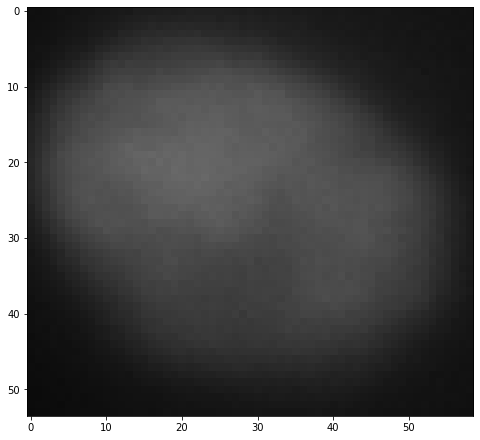

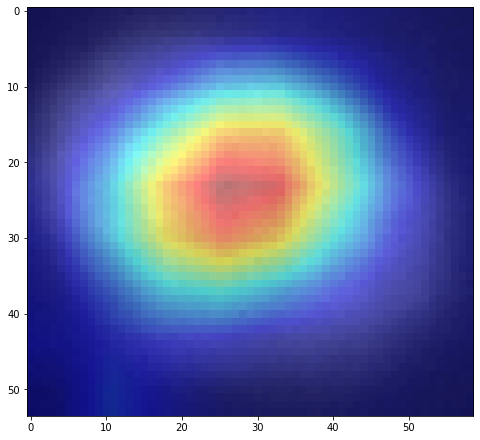

In [85]:
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.show()

merge_heatmap_image(heatmap, img_path)